# FOR VISUALIZING THE FEATURES

In [19]:
import os 
import librosa
import math
import json
import librosa.display

path = "/Users/Furqan Ali/Desktop/saylani_python/Coursera_learning/virufy_cleaned_file/cough_cleaned_touseef/Postive-con/pos-1.wav"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

mfcc = librosa.feature.mfcc(y,
                                sr =sr,
                                n_fft = 2048,
                                n_mfcc = 13,
                                hop_length = 512
                                )
                    
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)

features = np.concatenate((mfcc, chroma_cq, pitches, rolloff), axis = 0)

features = features.T
# zc = librosa.feature.zero_crossing_rate(y)

# print(spectral_entropy(zc, 100, method='welch', normalize=True))

# librosa.display.waveplot(zc[0], sr)

print(mfcc.shape)
print(chroma_cq.shape)
print(pitches.shape)
print(rolloff.shape)
print(features.shape)

(13, 454)
(12, 454)
(1025, 454)
(1, 454)
(454, 1051)


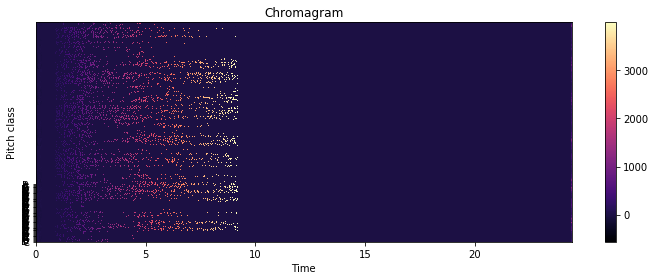

In [20]:
# for plotting features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

# Preprocessing cough data

In [2]:
# preprocessing testing

import cough_preprocess

DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "testing.json"
DURATION = 8  # measured in seconds.
num_segments = 3

cough_preprocess.save_features(DATASET_PATH, JSON_PATH, num_segments = num_segments, duration = DURATION )



 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-12.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-12.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-12.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-13.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-13.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-13.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-15.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-15.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-15.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-16.wav, segment : 0
cough_cleaned_touseef\Negative-co

# Training cough model

In [ ]:
# training the cough model

import cough_model as cm

    
# # Calling random forest class here:
DATASET_PATH = "fused_features.json"
save_model_in = "testing.sav"
test_size = 30
ran_state = 10
rf_maxdepth = 10
rf_ran_state = 170
rf_estimators = 150

ff = cm.RF_Model(DATASET_PATH, save_model_in, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)
mod = ff.train()

# Doing Prediction

In [18]:
# doing prediction

import numpy as np
import cough as CP

file_path = "./recent_toufeeq_cough_data/Negative-con/neg-61.wav"
saved_model = 'fused_results.sav'

gg = CP.predict(file_path, saved_model)
print("Covid positive rate: ", gg)

Results are :  [[0.56666667 0.43333333]
 [0.46       0.54      ]
 [0.56       0.44      ]]
class neg:  [0.5666666666666667, 0.56]
class pos:  [0.54]
Covid positive rate:  0


In [3]:
# Note 

# why dont we just make many segments of our audio sample and then classiy all those segments al together and then take a mean
# of all those samples and give 1 output so lets say if we have noise in the cough so normally when we have multiple segments 
# so some of segents will be containing noise and some of them will be containng meaningfull iformation and so when u do 
# classification on all those segments so most prbbaly the part which is conating cough will always predict right and the one 
# containng nouse will not get predicted well. 

# Extracting features using Mel spectograms technique. 

In [46]:
from mel_features import log_mel_spectrogram as lms


path = "/Users/Furqan Ali/Desktop/saylani_python/Coursera_learning/virufy_cleaned_file/cough_cleaned_touseef/Postive-con/pos-1.wav"

# Zero crossing rate
y, sr = librosa.load(path, sr = 22050)

features = lms(y, audio_sample_rate=16000,
                log_offset=0.01, window_length_secs=0.025, hop_length_secs= 0.010, num_mel_bins=64, 
                lower_edge_hertz=125, upper_edge_hertz= 7500
               )

print(features.shape)

(1450, 64)


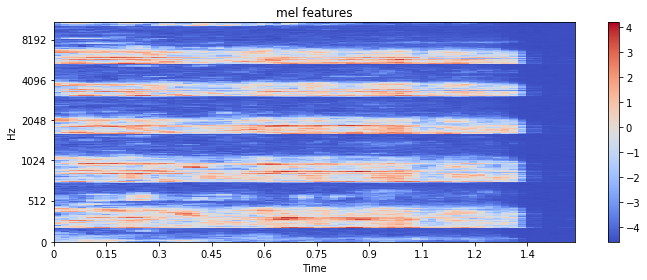

In [47]:
# for plotting features

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='mel', x_axis='time')
plt.colorbar()
plt.title('mel features')
plt.tight_layout()
plt.show()

# Experiment : 2

In [48]:
import os 
import librosa
import numpy as np
import math
import json
from mel_features import log_mel_spectrogram as lms

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


DATASET_PATH = "Re-Cough"
JSON_PATH = "testing.json"
# SAMPLE_RATE = 22050
DURATION = 10  # measured in seconds.
# SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_features(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5, duration = 8):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "features": [],
        "labels": []
    }
    
    SAMPLE_RATE = 16000
    SAMPLES_PER_TRACK = SAMPLE_RATE * duration
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                # loading audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    # feature
                    features = lms(signal[start_sample: finish_sample], audio_sample_rate=16000,
                                    log_offset=0.01, window_length_secs=0.025, hop_length_secs= 0.010, num_mel_bins=64, 
                                    lower_edge_hertz=125, upper_edge_hertz= 7500
                                   )
                    
                    data["features"].append(features.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_features(DATASET_PATH, JSON_PATH, num_segments = 3, duration = DURATION)  



 Processing Negative
Re-Cough\Negative\neg-0423-118-cough-m-t-56.wav, segment : 0
Re-Cough\Negative\neg-0423-118-cough-m-t-56.wav, segment : 1
Re-Cough\Negative\neg-0423-118-cough-m-t-56.wav, segment : 2
Re-Cough\Negative\neg-0423-119-cough-f-t-25.wav, segment : 0
Re-Cough\Negative\neg-0423-119-cough-f-t-25.wav, segment : 1
Re-Cough\Negative\neg-0423-119-cough-f-t-25.wav, segment : 2
Re-Cough\Negative\neg-0423-120-cough-m-t-30.wav, segment : 0
Re-Cough\Negative\neg-0423-120-cough-m-t-30.wav, segment : 1
Re-Cough\Negative\neg-0423-120-cough-m-t-30.wav, segment : 2
Re-Cough\Negative\neg-0423-122-cough-m-t-36.wav, segment : 0
Re-Cough\Negative\neg-0423-122-cough-m-t-36.wav, segment : 1
Re-Cough\Negative\neg-0423-122-cough-m-t-36.wav, segment : 2
Re-Cough\Negative\neg-0423-123-cough-m-t-48.wav, segment : 0
Re-Cough\Negative\neg-0423-123-cough-m-t-48.wav, segment : 1
Re-Cough\Negative\neg-0423-123-cough-m-t-48.wav, segment : 2
Re-Cough\Negative\neg-1-c.wav, segment : 0
Re-Cough\Negative\ne

Re-Cough\Positive\pos-25.wav, segment : 0
Re-Cough\Positive\pos-25.wav, segment : 1
Re-Cough\Positive\pos-25.wav, segment : 2
Re-Cough\Positive\pos-26.wav, segment : 0
Re-Cough\Positive\pos-26.wav, segment : 1
Re-Cough\Positive\pos-26.wav, segment : 2
Re-Cough\Positive\pos-27.wav, segment : 0
Re-Cough\Positive\pos-27.wav, segment : 1
Re-Cough\Positive\pos-27.wav, segment : 2
Re-Cough\Positive\pos-28.wav, segment : 0
Re-Cough\Positive\pos-28.wav, segment : 1
Re-Cough\Positive\pos-28.wav, segment : 2
Re-Cough\Positive\pos-29.wav, segment : 0
Re-Cough\Positive\pos-29.wav, segment : 1
Re-Cough\Positive\pos-29.wav, segment : 2
Re-Cough\Positive\pos-3.wav, segment : 0
Re-Cough\Positive\pos-3.wav, segment : 1
Re-Cough\Positive\pos-3.wav, segment : 2
Re-Cough\Positive\pos-30.wav, segment : 0
Re-Cough\Positive\pos-30.wav, segment : 1
Re-Cough\Positive\pos-30.wav, segment : 2
Re-Cough\Positive\pos-31.wav, segment : 0
Re-Cough\Positive\pos-31.wav, segment : 1
Re-Cough\Positive\pos-31.wav, segment

# Loading Data

In [2]:
import numpy as np
import math
import json

DATASET_PATH = "testing.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["features"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

print(X.shape)

(261, 331, 64)


# Plotting

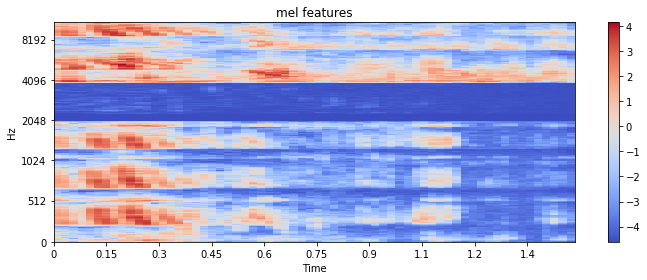

In [3]:
import matplotlib.pyplot as plt
import librosa, librosa.display

plt.figure(figsize=(10, 4))
librosa.display.specshow(X[1], y_axis='mel', x_axis='time')
plt.colorbar()
plt.title('mel features')
plt.tight_layout()
plt.show()

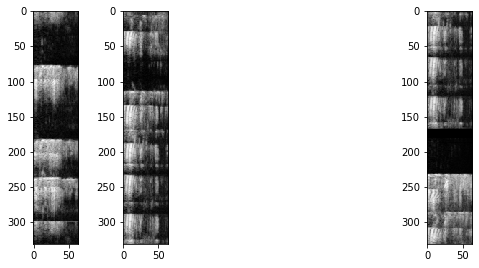

In [23]:
# if u have 3 color channels image, u need to uncomment below line. it will take mean if color channel to make it single channel image
# g = np.mean(X[0], -1)  # convert RGB to gray scale
# img = plt.imshow(X[0])
fig = plt.figure(figsize=(20, 30))
# for i in range(1, 5):
#   ax = fig.add_subplot(2, i, 1)
#   ax.imshow(X[i], cmap="gray")

ax = fig.add_subplot(6, 1, 1)
ax.imshow(X[1], cmap = "gray")

ax = fig.add_subplot(6, 2, 1)
ax.imshow(X[2], cmap = "gray")

ax = fig.add_subplot(6, 3, 1)
ax.imshow(X[3], cmap = "gray")

# img.set_cmap("gray")
# plt.axis("off")
# plt.show()

# Doing training 

In [52]:
# hyper parameters for SVC
kernel = ["linear","poly","rbf","sigmoid"]
degree = [2,3,4]
# gammas = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10]
# making C list  
C=[1, 10, 100, 200, 300, 400]


In [ ]:
from sklearn import svm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics

train, test, pred_train, pred_test = train_test_split(X, y, test_size = 0.20, random_state=20)

train = train.reshape(train.shape[0], (train.shape[1] * train.shape[2]))
test = test.reshape(test.shape[0], (test.shape[1] * test.shape[2]))

scores_svm = []

# prepare cross validation
kfold = KFold(3, True, 1)   # (folds ,shuffle, random_number)

for train_index, test_index in kfold.split(train):
    X_train, X_test = train[train_index], train[test_index]
    y_train, y_test = pred_train[train_index], pred_train[test_index]
    print(X_train.shape, X_test.shape)

    print("Training shape after flattening: ", train.shape)
    print("Training started ....")
    clf = svm.SVC(C=1, gamma= 10, degree = 4, kernel='poly', random_state=0)
    clf.fit(X_train, y_train)

    acc = clf.score(X_test, y_test)
    print("acc=%0.3f" % acc)
    scores_svm.append(acc)

print("Mean score is: ", np.mean(scores_svm))

  # y_pred = clf.predict(X_test)
  # print(metrics.classification_report(y_test, y_pred))  




# accuracy_history = []
# for i in kernel:
#     for j in degree:
#         for k in gammas:
#             for l in C:
#                 clf = svm.SVC(kernel = i,C=l, degree = j, gamma=k,random_state=0)
#                 clf.fit(train,y_train)
#                 pred = clf.predict(test)
#                 accuracy = clf.score(test, y_test)
#                 print("Accuracy on test dataset with",i,"kernel",j,"degree",k,"gamma",l,"C: ", accuracy)
#                 accuracy_history.append(accuracy)

# clf = svm.SVC(C=100, gamma= 100, degree = 4, kernel='poly', random_state=5)
# clf.fit(X_train, y_train)

# acc = clf.score(X_test, y_test)
# print("acc=%0.3f" % acc)

# from sklearn import metrics
# y_pred = clf.predict(X_test)
# print(metrics.classification_report(y_test, y_pred))

(138, 21184) (70, 21184)
Training shape after flattening:  (208, 21184)
Training started ....
